In [22]:
!pip install pystan==2.19.1.1

In [23]:
import pystan

In [70]:
import arviz as az

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
!git clone --depth=1 https://github.com/MatsuuraKentaro/RStanBook.git

fatal: destination path 'RStanBook' already exists and is not an empty directory.


In [29]:
code4_1 = """
data {
 int N;
 real Y[N];
}
 
parameters{
 real mu;
}
 
model {
   for (n in 1:N) {
    Y[n] ~ normal(mu, 1);
   }
   mu ~ normal(0, 100);
}
"""

In [30]:
# テキストデータを読み込む
file_path = '/kaggle/working/RStanBook/chap04/input/data-salary.txt'
salary = pd.read_csv(file_path)

In [31]:
salary

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546
5,35,781
6,38,750
7,40,601
8,40,814
9,43,792


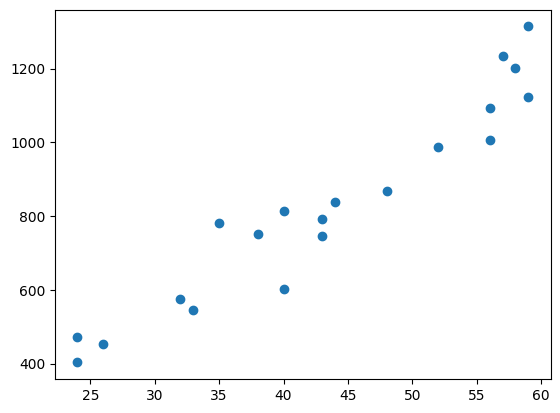

In [32]:
plt.scatter(salary['X'], salary['Y'])

In [33]:
code4_5 = """
data {
  int N;
  real X[N];
  real Y[N];
}
 
parameters {
  real a;
  real b;
  real<lower=0> sigma;
}


model {
  for (n in 1:N){
    Y[n] ~ normal(a + b*X[n], sigma);
  }
}

"""

In [34]:
sm = pystan.StanModel(model_code=code4_5)

In file included from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/pystan_oxu5e7t1/stanfit4anon_model_48ddf39ca14575381107d48420d48b53_3590323159805407486.cpp:1280:
/opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/prob/poisson_log_glm_log.hpp:5,
                 from /opt/conda/lib/python3.10/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:33

In [35]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       20 non-null     int64
 1   Y       20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [36]:
salary_dict = {
    "N": salary.shape[0],  # 数を割り当てる
    "X": salary['X'].tolist(),  # 'X'列を'X'キーの値としてリストに変換する
    "Y": salary['Y'].tolist()  # 'Y'列を'Y'キーの値としてリストに変換する
}

In [37]:
salary_dict

{'N': 20,
 'X': [24,
  24,
  26,
  32,
  33,
  35,
  38,
  40,
  40,
  43,
  43,
  44,
  48,
  52,
  56,
  56,
  57,
  58,
  59,
  59],
 'Y': [472,
  403,
  454,
  575,
  546,
  781,
  750,
  601,
  814,
  792,
  745,
  837,
  868,
  988,
  1092,
  1007,
  1233,
  1202,
  1123,
  1314]}

In [38]:
fit = sm.sampling(data=salary_dict, iter=2000, chains=4, seed=1234)




Gradient evaluation took 2.7e-05 seconds
Gradient evaluation took 2.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
Adjust your expectations accordingly!
Adjust your expectations accordingly!




Iteration:    1 / 2000 [  0%]  (Warmup)
Gradient evaluation took 3.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 3.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  200 / 2000 [ 10%

In [39]:
fit.extract() # array with shape (2000, 8)

OrderedDict([('a',
              array([-154.86604031, -230.35060963,    3.2278086 , ..., -202.52910501,
                     -102.57797003,   16.9986491 ])),
             ('b',
              array([22.36893867, 24.90995972, 19.05191544, ..., 24.16137824,
                     21.70661192, 19.7877603 ])),
             ('sigma',
              array([ 67.62701287, 109.51101938,  75.53396235, ...,  70.08390053,
                      77.41481642, 110.51742765])),
             ('lp__',
              array([-92.93612288, -95.26416613, -93.97297342, ..., -94.07544217,
                     -92.16115797, -96.16037435]))])

In [40]:
fit.summary

<bound method StanFit4Model.summary of Inference for Stan model: anon_model_48ddf39ca14575381107d48420d48b53.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -120.0    2.07  72.95 -258.0 -170.1 -119.2 -72.25  26.21   1241    1.0
b      21.91    0.05   1.63   18.6  20.86  21.88  23.02  24.97   1181    1.0
sigma   84.1    0.34   14.8  60.47  73.88  82.18  92.55 119.25   1893    1.0
lp__  -93.59    0.03   1.21 -96.58  -94.2 -93.29 -92.67 -92.15   1435    1.0

Samples were drawn using NUTS at Mon Mar 18 13:00:51 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).>

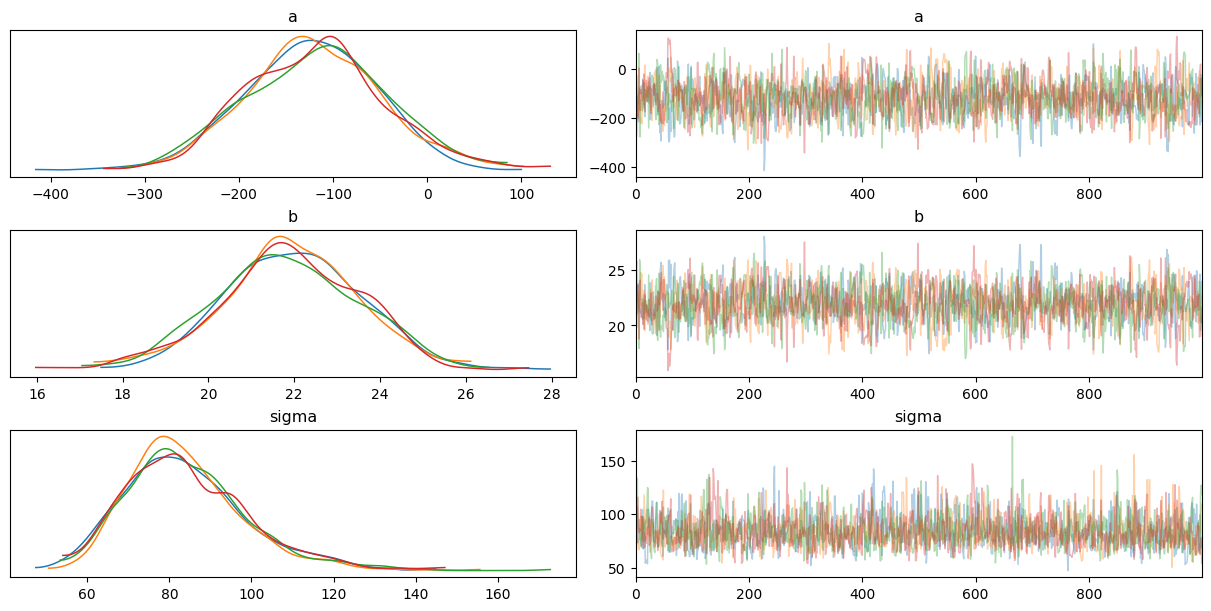

In [41]:
fig = az.plot_trace(fit, compact=False, backend_kwargs={"constrained_layout":True})

In [44]:
import os
import sys

# set environmental variable STAN_NUM_THREADS
# Use 4 cores per chain
os.environ['STAN_NUM_THREADS'] = "4"

# Example model
# see http://discourse.mc-stan.org/t/cant-make-cmdstan-2-18-in-windows/5088/18
stan_code = """
functions {
  vector bl_glm(vector mu_sigma, vector beta,
                real[] x, int[] y) {
    vector[2] mu = mu_sigma[1:2];
    vector[2] sigma = mu_sigma[3:4];
    real lp = normal_lpdf(beta | mu, sigma);
    real ll = bernoulli_logit_lpmf(y | beta[1] + beta[2] * to_vector(x));
    return [lp + ll]';
  }
}
data {
  int<lower = 0> K;
  int<lower = 0> N;
  vector[N] x;
  int<lower = 0, upper = 1> y[N];
}
transformed data {
  int<lower = 0> J = N / K;
  real x_r[K, J];
  int<lower = 0, upper = 1> x_i[K, J];
  {
    int pos = 1;
    for (k in 1:K) {
      int end = pos + J - 1;
      x_r[k] = to_array_1d(x[pos:end]);
      x_i[k] = y[pos:end];
      pos += J;
    }
  }
}
parameters {
  vector[2] beta[K];
  vector[2] mu;
  vector<lower=0>[2] sigma;
}
model {
  mu ~ normal(0, 2);
  sigma ~ normal(0, 2);
  target += sum(map_rect(bl_glm, append_row(mu, sigma),
                         beta, x_r, x_i));
}
"""

stan_data = dict(
    K = 4,
    N = 12,
    x = [1.204, -0.573, -1.35, -1.157,
         -1.29, 0.515, 1.496, 0.918,
         0.517, 1.092, -0.485, -2.157],
    y = [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
)

In [45]:
extra_compile_args = ['-pthread', '-DSTAN_THREADS']

stan_model = pystan.StanModel(
    model_code=stan_code,
    extra_compile_args=extra_compile_args
)


DIAGNOSTIC(S) FROM PARSER:
Info: integer division implicitly rounds to integer. Found int division: N / K
 Positive values rounded down, negative values rounded up or down in platform-dependent way.

In file included from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/pystan_uidfhkai/stanfit4anon_model_b06ba8857b9577a11f45439d5caaf32a_7047660559127537008.cpp:1282:
/opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /opt/conda/lib/python3.10/site

In [46]:
# use the default 4 chains == 4 parallel process
# used cores = min(cpu_cores, 4*STAN_NUM_THREADS)
fit = stan_model.sampling(data=stan_data, n_jobs=4)

print(fit)



Gradient evaluation took 0.000662 seconds
Gradient evaluation took 0.000322 seconds
1000 transitions using 10 leapfrog steps per transition would take 6.62 seconds.
1000 transitions using 10 leapfrog steps per transition would take 3.22 seconds.
Adjust your expectations accordingly!
Adjust your expectations accordingly!





Gradient evaluation took 0.000426 seconds
1000 transitions using 10 leapfrog steps per transition would take 4.26 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 0.000517 seconds
1000 transitions using 10 leapfrog steps per transition would take 5.17 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [

In [48]:
fit = sm.sampling(data=salary_dict, iter=2000, chains=4, seed=1234)


Gradient evaluation took 2.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)


Gradient evaluation took 2.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 3.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 2.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  200 / 2000 [ 10%

In [51]:
ms = fit.extract()

In [53]:
ms['b']

array([22.36893867, 24.90995972, 19.05191544, ..., 24.16137824,
       21.70661192, 19.7877603 ])

In [59]:
np.quantile(ms['b'], 0.025)

18.60338412711103

In [60]:
np.quantile(ms['b'], 0.975)

24.9657070249858

In [64]:
d_mcmc = pd.DataFrame({'a': ms['a'], 'b': ms['b'], 'sigma': ms['sigma']})
d_mcmc.head()

,a,b,sigma
0,-154.866040,22.368939,67.627013
1,-230.350610,24.909960,109.511019
2,3.227809,19.051915,75.533962
3,-189.679173,23.532516,93.243122
4,-15.923938,19.447235,121.208633


/opt/conda/lib/python3.10/site-packages/arviz/plots/pairplot.py:232: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  gridsize = int(dataset.dims["draw"] ** 0.35)


array([[<Axes: ylabel='b'>, <Axes: >],
       [<Axes: xlabel='a', ylabel='sigma'>, <Axes: xlabel='b'>]],
      dtype=object)

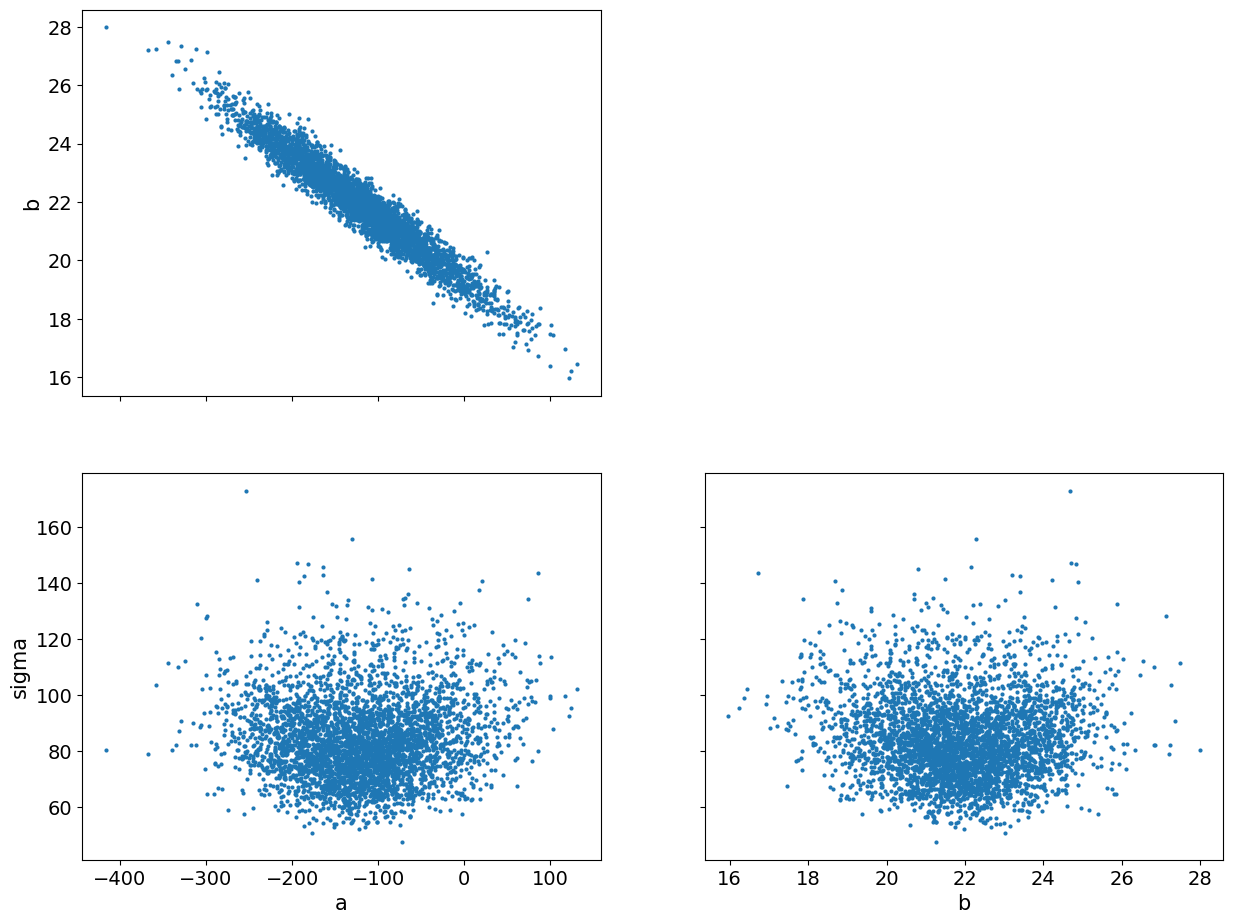

In [72]:
az.plot_pair(fit)

In [83]:
# fitオブジェクトからパラメータの値を抽出する
samples = fit.extract()

# 抽出したパラメータの値をデータフレームに変換する
df = pd.DataFrame(samples)
df

,a,b,sigma,lp__
0,-154.866040,22.368939,67.627013,-92.936123
1,-230.350610,24.909960,109.511019,-95.264166
2,3.227809,19.051915,75.533962,-93.972973
3,-189.679173,23.532516,93.243122,-93.059983
4,-15.923938,19.447235,121.208633,-95.548355
...,...,...,...,...
3995,-176.987564,22.799489,69.292260,-93.193910
3996,-111.155441,21.468910,68.335724,-92.606090
3997,-202.529105,24.161378,70.083901,-94.075442
3998,-102.577970,21.706612,77.414816,-92.161158
